In [67]:


#%matplotlib inline  
import numpy as np
import scipy.signal
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams.update({'font.size': 12})



In [68]:
#PARAMETERS
freq_cutoff = 100
w_cutoff = 2 * np.pi * freq_cutoff
order = 5
normalization = 'delay' # 'mag' or 'phase'

tau_accepted_dev = 0.05

#make the filter
[zeros, poles, gain] =  scipy.signal.bessel(order , w_cutoff, "lowpass", analog=True, output='zpk', norm=normalization)
[num, den] =            scipy.signal.bessel(order , w_cutoff, "lowpass", analog=True, output='ba', norm=normalization)

#frequency response
w = np.logspace(np.log10(w_cutoff / 1000), np.log10(w_cutoff * 10), 3000) 
f = w / (2 * np.pi)

w_resp, h = scipy.signal.freqs(num, den, worN = w)
mag_db = 20 * np.log10(np.abs(h))
phase = np.unwrap(np.angle(h))

#group delay
dphi = np.diff(phase)
dw = np.diff(w_resp)
tau = -dphi / dw
f_tau = (f[:-1] + f[1:]) / 2

tau_dev = np.abs((tau - tau[0]) / tau[0])
idx = np.argmax(tau_dev > tau_accepted_dev)
f_flat_end = f_tau[idx] if idx else None


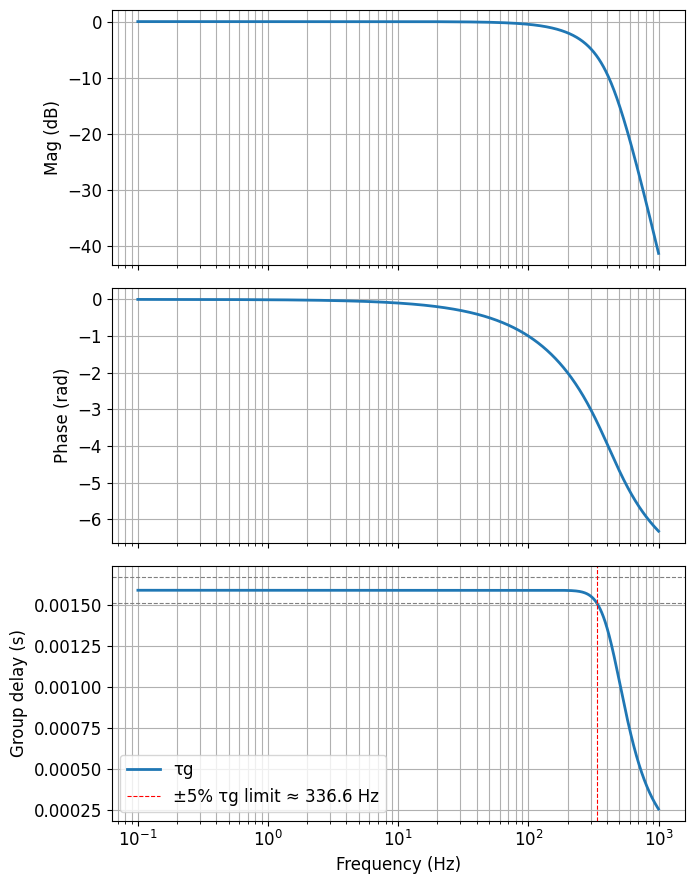

In [69]:
f_flat_end = f_tau[idx] if idx else None

# -------------------------------------------------- plot
fig, ax = plt.subplots(3, 1, figsize=(7, 9), sharex=True)

ax[0].semilogx(f, mag_db)
ax[0].set_ylabel('Mag (dB)')
ax[0].grid(True, which='both')

ax[1].semilogx(f, phase)
ax[1].set_ylabel('Phase (rad)')
ax[1].grid(True, which='both')

ax[2].semilogx(f_tau, tau, label='τg')
ax[2].axhline(tau[0]*(1+tau_accepted_dev), color='grey', ls='--', lw=0.8)
ax[2].axhline(tau[0]*(1-tau_accepted_dev), color='grey', ls='--', lw=0.8)
if f_flat_end:
    ax[2].axvline(f_flat_end, color='red', ls='--', lw=0.8,
                  label=f'±{tau_accepted_dev*100:.0f}% τg limit ≈ {f_flat_end:.1f} Hz')
ax[2].set_ylabel('Group delay (s)')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].grid(True, which='both')
if f_flat_end: ax[2].legend()

# fig.suptitle(f'{order}-pole Bessel LPF  •  norm={norm}  •  f_c={fc} Hz')
plt.tight_layout()
plt.show()